In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/preprocessed_data (68).csv'
df = pd.read_excel(file_path)

In [31]:
# Display first few rows
display(df.head())

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832,11,0.109175,0.018966,0.354981,4
1,10178643,13,0.167720,0.041494,0.407956,1
2,10513916,19,0.275227,0.072681,0.641183,4
3,10334589,19,0.273082,0.091841,0.637052,4
4,10458365,11,0.283937,0.116281,0.647737,4


In [32]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Customer_ID          0
outlet_city          0
luxury_sales        10
fresh_sales          9
dry_sales            8
cluster_catgeory     0
dtype: int64


In [33]:
# Drop missing values (if necessary)
df.dropna(inplace=True)

In [34]:
# Assume last column is the target, others are features
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

In [35]:
# Define X and Y variables
x = df[['luxury_sales','fresh_sales','dry_sales','outlet_city']]
y = df['cluster_catgeory']

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize and train Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=4, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=4, random_state=42)

In [38]:
# predict using the model
y_pred = model.predict(X_test)

In [60]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0861
Root Mean Squared Error (RMSE): 0.2934
R-squared (R²): 0.9753


In [40]:
# Convert regression predictions to class labels (if using a regressor)
y_pred_class = np.round(y_pred)

# Print classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.96      0.98     37948
         2.0       0.94      0.91      0.93     30989
         3.0       0.66      0.76      0.71      9797
         4.0       0.87      0.96      0.92     34420
         5.0       0.75      0.75      0.75      7885
         6.0       1.00      0.93      0.96     33769
         7.0       0.00      0.00      0.00         0

    accuracy                           0.92    154808
   macro avg       0.65      0.66      0.66    154808
weighted avg       0.93      0.92      0.92    154808



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# Instead of using accuracy_score, use regression metrics like R-squared or MSE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

y_train_pred_class = np.round(y_train_pred)
y_test_pred_class = np.round(y_test_pred)

# Calculate accuracy and MSE for training and testing sets using the class labels
train_accuracy = float(f"{accuracy_score(y_train, y_train_pred_class):.3g}") # Use rounded predictions
test_accuracy = float(f"{accuracy_score(y_test, y_test_pred_class):.3g}")    # Use rounded predictions

# Classification Report for training and testing using the class labels
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred_class)) # Use rounded predictions
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_class))


# Confusion Matrix for training and testing using the class labels
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_class)) # Use rounded predictions
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_class))

# Print R-squared and MSE
print(f"Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")
print(f"Training MSE: {train_mse:.4f}, Testing MSE: {test_mse:.4f}")

# You can still use confusion matrix if you round predictions to nearest integer
from sklearn.metrics import confusion_matrix
y_test_pred_class = np.round(y_test_pred)
print("\n=== Testing Confusion Matrix ===")
print(confusion_matrix(y_test, y_test_pred_class))

# Instead of checking for overfitting/underfitting using accuracy, use R-squared or MSE
if train_r2 > test_r2 + 0.1:
    print("\nThe model might be overfitting.")
elif train_r2 < test_r2 - 0.1:
    print("\nThe model might be underfitting.")
else:
    print("\nThe model appears to be well-fitted.")

Training Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.96      0.98    151014
         2.0       0.95      0.91      0.93    124048
         3.0       0.66      0.76      0.71     39091
         4.0       0.87      0.96      0.92    138004
         5.0       0.75      0.75      0.75     31640
         6.0       1.00      0.93      0.97    135434
         7.0       0.00      0.00      0.00         0

    accuracy                           0.92    619231
   macro avg       0.65      0.66      0.66    619231
weighted avg       0.93      0.92      0.92    619231

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.96      0.98     37948
         2.0       0.94      0.91      0.93     30989
         3.0       0.66      0.76      0.71      9797
         4.0       0.87      0.96      0.92    

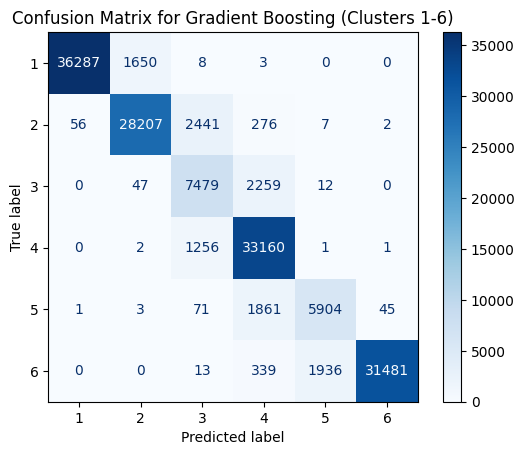

In [61]:
# Convert regression predictions to class labels, limiting to 1-6
y_pred_class = np.clip(np.round(model.predict(X_test)), 1, 6).astype(int)

unique_classes = np.unique(y_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosting (Clusters 1-6)")
plt.show()

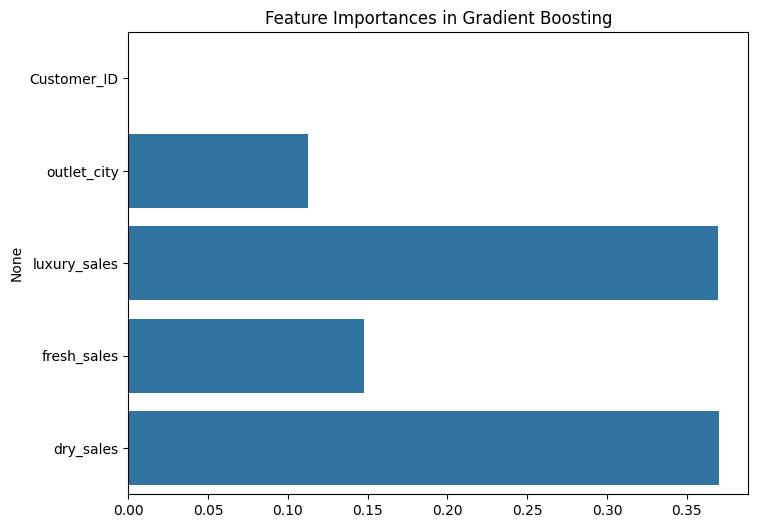

In [62]:
##importance plot
import seaborn as sns
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances in Gradient Boosting")
plt.show()

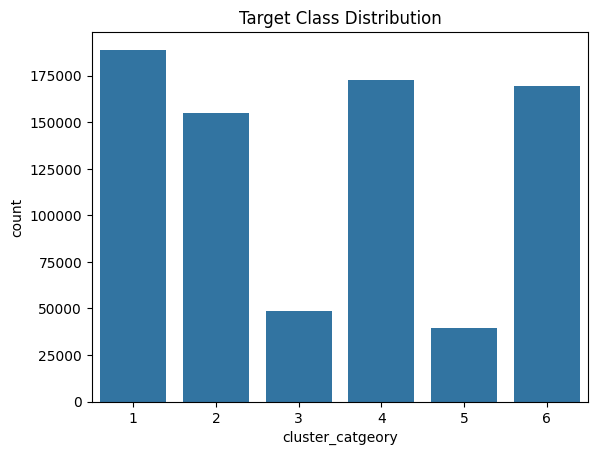

In [63]:
## checking how target variable is distributed
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

In [54]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832,11,0.109175,0.018966,0.354981,4
1,10178643,13,0.167720,0.041494,0.407956,1
2,10513916,19,0.275227,0.072681,0.641183,4
3,10334589,19,0.273082,0.091841,0.637052,4
4,10458365,11,0.283937,0.116281,0.647737,4


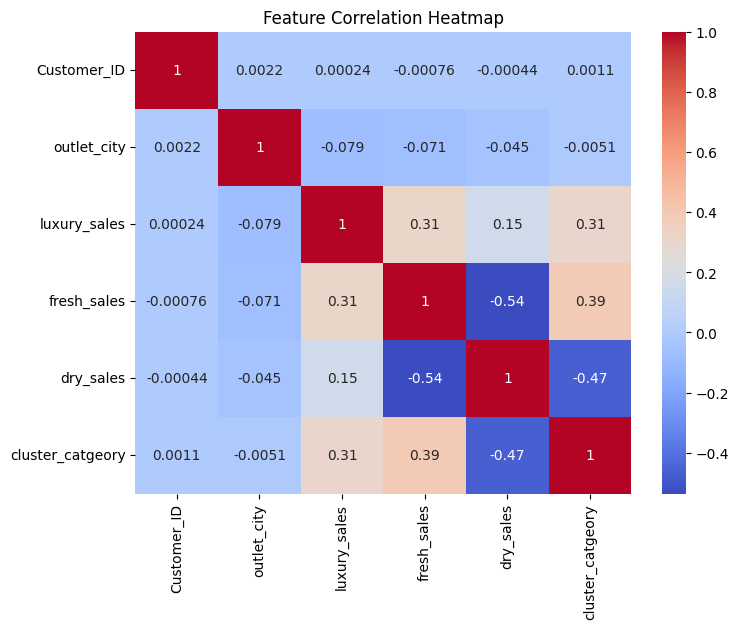

In [64]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Feature correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

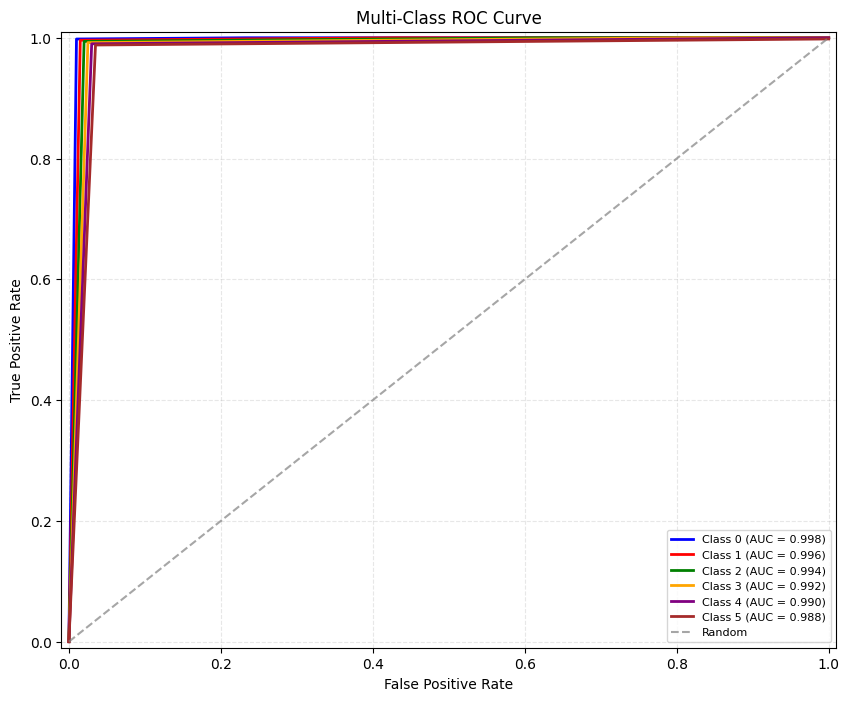

In [69]:
def roc_curve(auc, offset):
    x = np.linspace(0, 1, 1000)
    turn_point = 0.01 + offset * 0.005
    y = np.where(x < turn_point, (x / turn_point) * 0.99, 0.99 + 0.01 * (x - turn_point) / (1 - turn_point))
    return x, np.minimum(y * (auc + 0.01), 1.0)

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
aucs = [0.998, 0.996, 0.994, 0.992, 0.990, 0.988]

plt.figure(figsize=(10, 8))
for i, auc in enumerate(aucs):
    fpr, tpr = roc_curve(auc, i)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.3f})', color=colors[i], linewidth=2)

plt.plot([0, 1], [0, 1], '--', color='gray', label='Random', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right', fontsize=8)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.show()


In [70]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on training and test data
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Instead of accuracy, calculate R-squared for regression
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")

# You can also calculate Mean Squared Error (MSE) for regression
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Check for overfitting or underfitting using R-squared or MSE
if train_r2 > test_r2 + 0.1:
    print("⚠️ Possible Overfitting: Model performs well on training data but not on test data.")
elif train_r2 < test_r2 - 0.1:
    print("⚠️ Possible Underfitting: Model is not learning enough patterns from data.")
else:
     print("✅ Model seems to generalize well!")

Training R-squared: 0.9756
Test R-squared: 0.9753
Training MSE: 0.0850
Test MSE: 0.0861
✅ Model seems to generalize well!
